# Part1
1 and 2


In [197]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [198]:
def relu(x):
    return np.maximum(0, x)

In [199]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [614]:
def ff_nn_ReLu(x, w, b, v, c):
    h = relu(np.dot(x, w)+b)
    y_hat = sigmoid(np.dot(h, v)+c)
    return y_hat

In [615]:
x = np.array([[1, -1], [0, -1], [0, 1]])
w = np.array([[1, -1, 0], [0, 0, 0.5]])
b = np.array([0, 0, 1])
v = np.array([1, 0, -1]).reshape(3, 1)
c = np.array([1])

### 4

In [616]:
y_hat = ff_nn_ReLu(x, w, b, v, c)
print (y_hat)

[[0.81757448]
 [0.62245933]
 [0.37754067]]


# Part 2

### 1

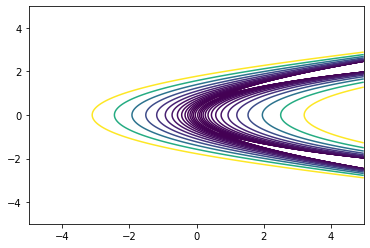

In [617]:
step = 0.01
x_origin = np.arange(-5.0, 5.0, step)
y_origin = np.arange(-5.0, 5.0, step)
x, y = np.meshgrid(x_origin, y_origin)
z = (1-x*x*x)+100*((y*y-x)**2)
fig, ax = plt.subplots()
CS = ax.contour(x, y, z, levels=np.logspace(start=-1,stop=3, num=20))

In [618]:
def gradient(x, y):
    dx = -3*x*x-200*(y*y-x)
    dy = 400*(y*y-x)*y
    return np.array([dx, dy])

In [619]:
def gradient_descent(start_point, learning_rate, iterations):
    traj = []
    p = start_point if start_point else np.random.uniform(-5, 5, size=2)
    traj.append(p)
    for i in range(iterations):
        p = p - (learning_rate * gradient(p[0], p[1]))
        traj.append(p)
    return np.array(traj)

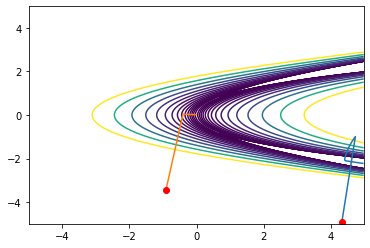

In [620]:
fig, ax = plt.subplots()

x, y = np.meshgrid(x_origin, y_origin)
z = (1-x*x*x)+100*((y*y-x)**2)
CS = ax.contour(x, y, z, levels=np.logspace(start=-1,stop=3, num=20))

learning_rates = [0.0001, 0.0002]
for i in range(len(learning_rates)):
    traj = gradient_descent(None, learning_rate = learning_rates[i], iterations = 100)
    x = traj[:,0]
    y = traj[:,1]
    ax.plot(x,y,'-')
    ax.plot(x[0],y[0],'ro')

In [621]:
def gradient_descent_momentum(start_point, iterations, alpha, epi):
    traj = []
    p = start_point if start_point else np.random.uniform(-5, 5, size=2)
    traj.append(p)
    v = np.zeros(2)
    for i in range(iterations):
        g = gradient(p[0], p[1])
        v = alpha*v+epi*g
        p = p - v
        traj.append(p)
    return np.array(traj)

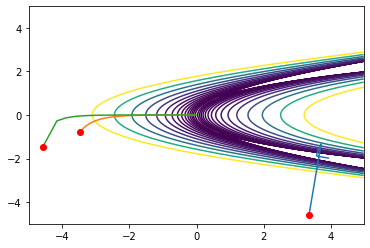

In [622]:
fig, ax = plt.subplots()
x, y = np.meshgrid(x_origin, y_origin)
z = (1-x*x*x)+100*((y*y-x)**2)
CS = ax.contour(x, y, z, levels=np.logspace(start=-1,stop=3, num=20))

params = [(0.0001, 0.0001), (0.0002, 0.0002), (0.0003, 0.0003)]
for alpha, epi in params:
    traj = gradient_descent_momentum(None, iterations = 100, alpha=alpha, epi=epi)
    x = traj[:,0]
    y = traj[:,1]
    ax.plot(x,y,'-')
    ax.plot(x[0],y[0],'ro')

# Part3

### 1

In [703]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def loss_func(y, y_hat):
    return  -y * np.log(y_hat)-(1-y) * np.log(1-y_hat)
def loss_func_derivative(y, y_hat):
    return -y/y_hat+(1-y)/(1-y_hat)

def grad_f(x, y, point):
    w, b, v, c = point
    temp = np.dot(x,w) + b
    h = relu(temp)
    out = np.dot(h, v)+c
    y_hat = sigmoid(out)

    d_c = loss_func_derivative(y,y_hat)*sigmoid_derivative(y_hat) #np.dot((y/y_hat-(1-y)/(1-y_hat)).T, sigmoid_derivative(out))
    d_c2 = np.average(d_c, axis=0)
    d_v = np.dot(d_c.T, h).T
    d_b = np.where(temp>0, 1, 0) * np.dot(loss_func_derivative(y,y_hat), v.T)
    d_b2 = np.average(d_b, axis=0)
    d_w = np.dot(x.T, d_b)
    return (d_w, d_b2, d_v, d_c2)
y = np.array([[1], [1], [0]])
x = np.array([[1, -1], [0, -1], [0, 1]])
w = np.array([[1, -1, 0], [0, 0, 0.5]])
b = np.array([0, 0, 1])
v = np.array([1, 0, -1]).reshape(3, 1)
c = np.array([1])
print (grad_f(x,y,[w, b, v, c]))

(array([[-1.22313016,  0.        ,  1.22313016],
       [ 1.22313016,  0.        , -4.43619148]]), array([-0.40771005,  0.        ,  0.40771005]), array([[-0.25988102],
       [ 0.        ],
       [ 0.26898559]]), array([-0.07911231]))


In [704]:
def create_data(num):
    x, y = [], []
    for i in range(num):
        v1 = np.random.uniform(-3, 3)
        v2 = np.random.uniform(-3, 3)
        x.append([v1, v2])
        value = 1 if v1 * v2 > 0 else 0
        y.append(value)
    
    return np.array(x), np.array(y)

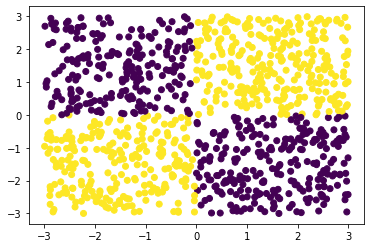

In [705]:
x, y = create_data(1000)
plt.scatter(x[:,0], x[:,1], c=y)

In [706]:
def ff_nn_ReLu2(x, point):
    w, b, v, c = point
    h = relu(np.dot(x, w)+b)
    y_hat = sigmoid(np.dot(h, v)+c)
    return y_hat

def loss(x, y, point):
    y_hat = ff_nn_ReLu2(x, point)
    return loss_func(y, y_hat).sum()

def grad_descent(x, y, starting_point, learning_rate, iterations):
    point = np.array(starting_point)
    trajectory = [point]
    losses = [loss(x, y, point)]
    
    for i in range(iterations):
        grads = grad_f(x, y, point)
        point = np.subtract(point, [i*learning_rate for i in grads])
        trajectory.append(point)
        losses.append(loss(x, y, point))
    
    return (np.array(trajectory), losses)

In [707]:
traj, losses = grad_descent(x, y.reshape(len(y), 1), [w, b, v, c], 0.0001, 50)


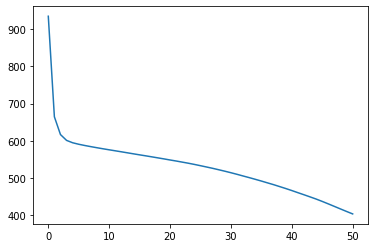

In [708]:
plt.plot(losses,'-')

In [709]:
def gradient_descent_momentum2(x, y, starting_point, iterations, alpha, epi):
    w, b, v, c = starting_point
    point = np.array(starting_point)
    trajectory = [point]
    losses = [loss(x, y, point)]
    velocity = np.array([np.zeros(w.shape), np.zeros(b.shape), np.zeros(v.shape), np.zeros(c.shape)])
    for i in range(iterations):
        grads = np.array(grad_f(x, y, point))
        velocity = alpha*velocity+epi*grads
        point = np.subtract(point, [ i in velocity])
        trajectory.append(point)
        losses.append(loss(x, y, point))
    return (np.array(trajectory), losses)

In [710]:
traj, losses2 = gradient_descent_momentum2(x, y.reshape(len(y), 1), [w, b, v, c], iterations = 100, alpha=alpha, epi=epi)

/Users/yl947/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


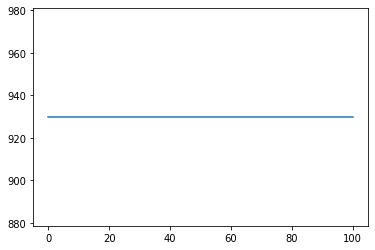

In [702]:
plt.plot(losses2,'-')